In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**PreProcess For Datasets**

In [269]:
path_file='/content/drive/Shareddrives/Embible/Data/Results/'
file_names=['CharHitAt','WordHitAt']
lst_dataframes=[]
c=0
for i in [1,5]:
  for j in file_names:
    lst_dataframes.append(pd.read_csv(path_file+'baseline2-'+j+str(i)+'.csv'))
    lst_dataframes.append(pd.read_csv(path_file+'ensemble-'+j+str(i)+'.csv'))
    if j=='CharHitAt':
        lst_dataframes[c]['Char/Word']=['Char'+str(i)]*len(lst_dataframes[c])
        lst_dataframes[c+1]['Char/Word']=['Char'+str(i)]*len(lst_dataframes[c+1])
    else:
       lst_dataframes[c]['Char/Word']=['Word'+str(i)]*len(lst_dataframes[c])
       lst_dataframes[c+1]['Char/Word']=['Word'+str(i)]*len(lst_dataframes[c+1])
    c+=2

In [270]:
new_df=[]
for i in lst_dataframes:
 i['file'] = i['file'].str.rsplit('/', n=1, expand=True)[1]
 i['file'] = i['file'].str.replace('json', '')
 new_df.append(i)

### **A function that plots a graph that compares the charhit@k and wordshit@k results of a model**

In [271]:
def plot_graph(df_words_results,df_chars_results,colors1,colors2,model_name):
  fig, axs = plt.subplots(1, 2, figsize=(10, 5))

  # Create the barplots
  sns.barplot(x='file', y='hit@k',data=df_words_results,hue='Char/Word',palette=colors1, ax=axs[0])
  sns.barplot(x='file', y='hit@k',data=df_chars_results,hue='Char/Word',palette=colors2, ax=axs[1])

  # Set the titles and the labels
  axs[0].set_title("Word Hit@k-" + model_name +"Model", fontsize=10, fontweight="bold")
  axs[0].set_xlabel("Percentage Of Masking Dataset", fontsize=12)
  axs[0].set_ylabel("Hit@K", fontsize=12)
  axs[1].set_title("Char Hit@k-" + model_name +"Model", fontsize=10, fontweight="bold")
  axs[1].set_xlabel("Percentage Of Masking Dataset", fontsize=12)
  axs[1].set_ylabel("Hit@K", fontsize=12)

  # Set the legend
  legend_elements2 = [plt.Line2D([0], [0],marker='o', color='w', label='WordHit@1', markerfacecolor=colors1[0], markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='WordHit@5', markerfacecolor=colors1[1], markersize=10)]
  axs[0].legend(handles=legend_elements2, loc='upper right')

  legend_elements1= [plt.Line2D([0], [0],marker='o', color='w', label='CharHit@1', markerfacecolor=colors2[0], markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='CharHit@5', markerfacecolor=colors2[1], markersize=10)]
  axs[1].legend(handles=legend_elements1, loc='upper right')

  # Set the tick parameters
  axs[0].tick_params(axis='both', which='major', labelsize=10)
  axs[1].tick_params(axis='both', which='major', labelsize=10)

  # Tighten the layout
  plt.tight_layout()

  # Show the plot
  plt.show()

## **WordHitAt@K & CharHitAt@K For Ensemble Model**

In [272]:
dfs = [new_df[7], new_df[3]]
merged_df_words = pd.concat(dfs, axis=0, ignore_index=True)

dfs2 = [new_df[1], new_df[5]]
merged_df_chars = pd.concat(dfs2, axis=0, ignore_index=True)


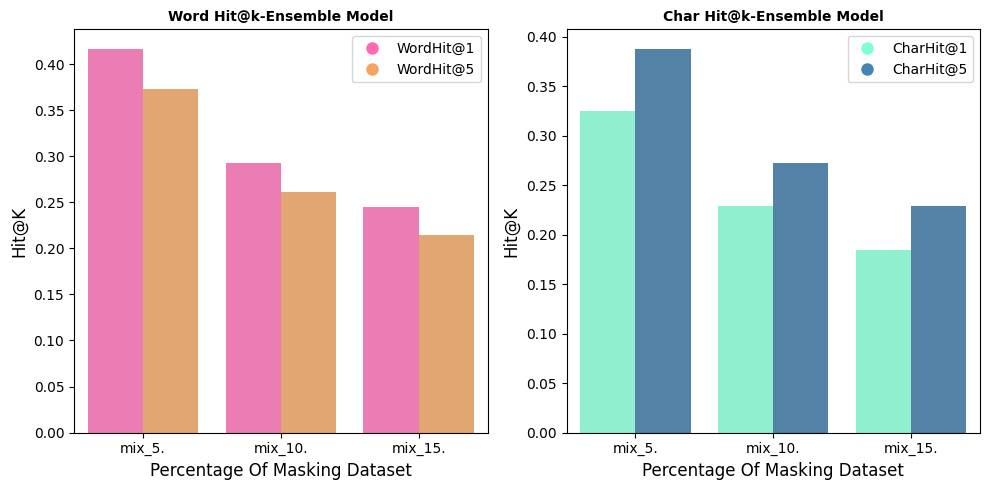

In [273]:
plot_graph(merged_df_words,merged_df_chars,["#FF69B4", "sandybrown"],["aquamarine", "steelblue"],'Ensemble ')

## **FineTuned Models:**

In [274]:
dfs_finetunied_models = [new_df[0], new_df[4]]
merged_df_finetuned_chars = pd.concat(dfs_finetunied_models, axis=0, ignore_index=True)

dfs_finetunied_models2 = [new_df[2], new_df[6]]
merged_df_finetuned_words = pd.concat(dfs_finetunied_models2, axis=0, ignore_index=True)


In [275]:
lst_word_chars_results_foreach_model=[]
for df in [merged_df_finetuned_chars,merged_df_finetuned_words]:
  groups = df.groupby('model')
  lst_finetuned_models=[]
  # Iterate over groups and create individual dataframes
  for name, group in groups:
      # Create new dataframe with only rows for current group
      new_df = group.copy()
      lst_finetuned_models.append(new_df)
  
  lst_word_chars_results_foreach_model.append(lst_finetuned_models)


### **A function that plots a graph that compares the charhit@k and wordshit@k results of all the types of a FineTuned Model**

In [276]:
def plot_results_finetuning(lst_word_chars_results_foreach_model,colors1,color2,model_name,index):
  fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,12))

  for i,epochs in enumerate(['10 epochs','20 epochs','50 epochs']):
      sns.barplot(x='file', y='hit@k',data=lst_word_chars_results_foreach_model[1][i+index],hue='Char/Word',palette=colors1, ax=axs[i,0])
      sns.barplot(x='file', y='hit@k',data=lst_word_chars_results_foreach_model[0][i+index],hue='Char/Word',palette=color2, ax=axs[i,1])
      axs[i,0].set_title("Word Hit@k-" + epochs, fontsize=10, fontweight="bold")
      axs[i,0].set_xlabel("Percentage Of Masking Dataset", fontsize=8)
      axs[i,0].set_ylabel("Hit@K", fontsize=12)
      axs[i,1].set_title("Char Hit@k-" + epochs, fontsize=10, fontweight="bold")
      axs[i,1].set_xlabel("Percentage Of Masking Dataset", fontsize=8)
      axs[i,1].set_ylabel("Hit@K", fontsize=12)
      legend_elements2 = [plt.Line2D([0], [0],marker='o', color='w', label='WordHit@1', markerfacecolor=colors1[0], markersize=6),
                    plt.Line2D([0], [0], marker='o', color='w', label='WordHit@5', markerfacecolor=colors1[1], markersize=6)]
      axs[i,0].legend(handles=legend_elements2, loc='upper right')

      legend_elements1= [plt.Line2D([0], [0],marker='o', color='w', label='CharHit@1', markerfacecolor=color2[0], markersize=6),
                    plt.Line2D([0], [0], marker='o', color='w', label='CharHit@5', markerfacecolor=color2[1], markersize=6)]
      axs[i,1].legend(handles=legend_elements1, loc='upper right')

  fig.suptitle(model_name+ ' Results', fontsize=20)

  # Adjust the layout of the subplots
  fig.tight_layout()

### **AlephBertGimel Results:**

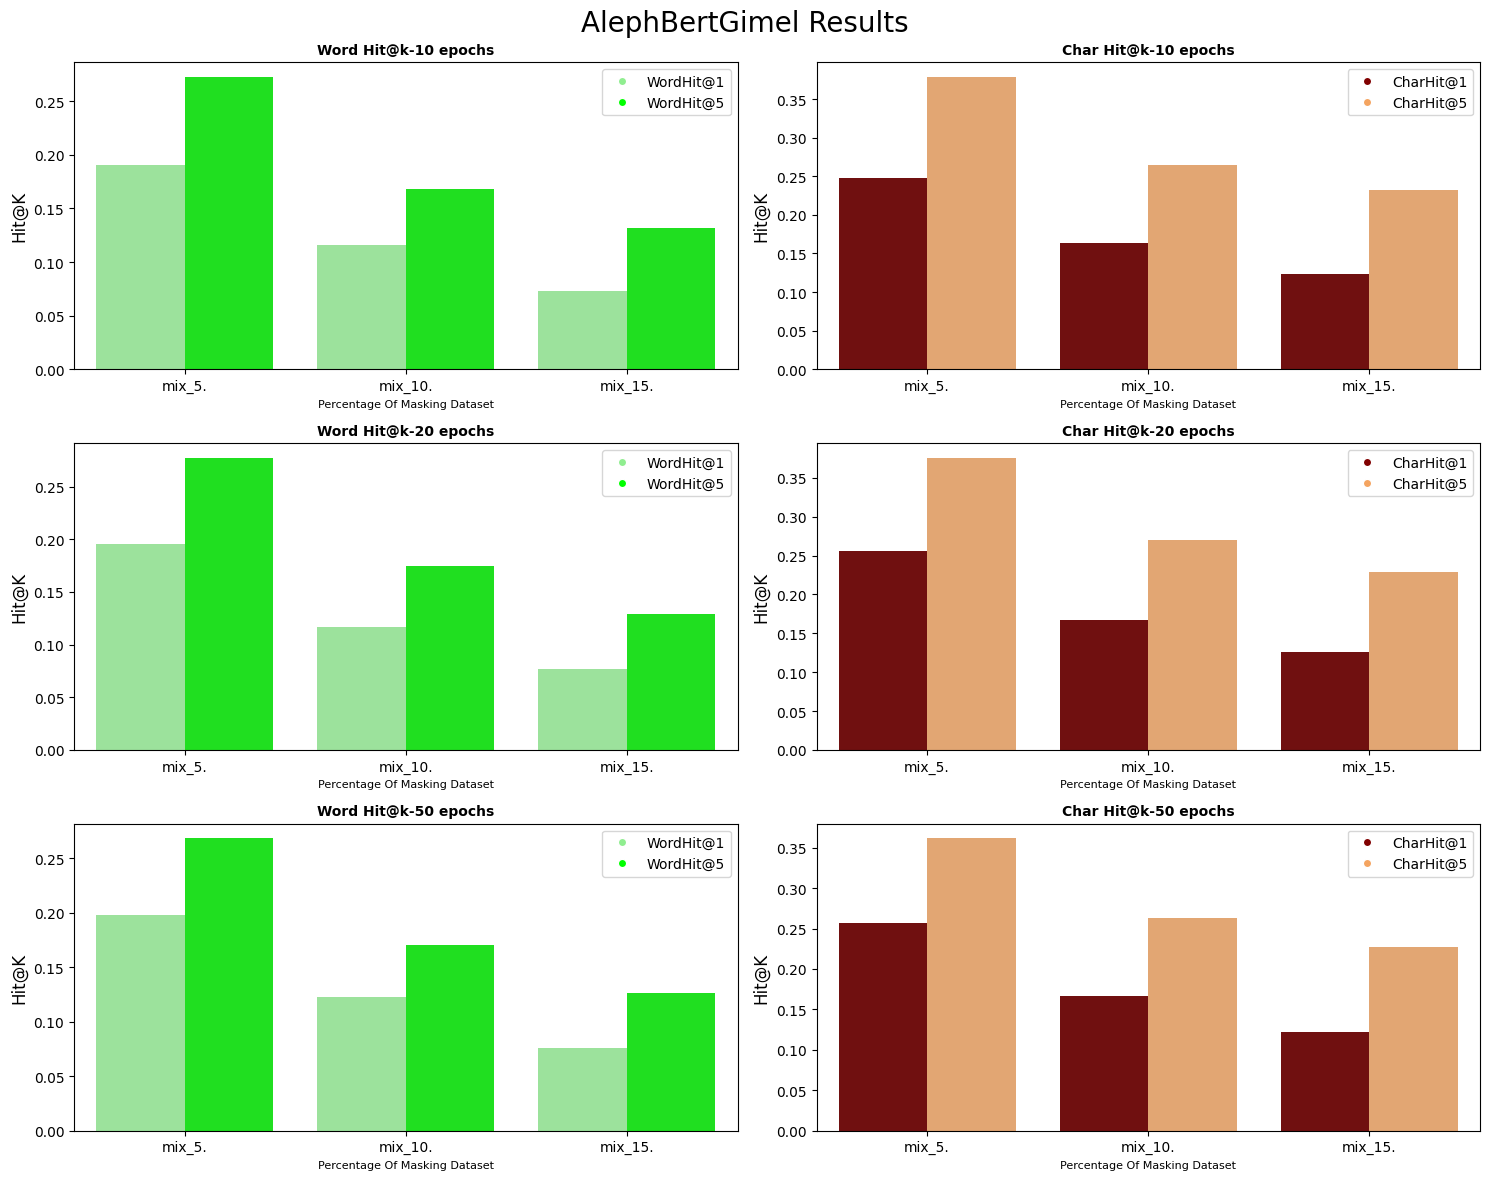

In [277]:
plot_results_finetuning(lst_word_chars_results_foreach_model,["lightgreen", "lime"],["maroon", "sandybrown"],"AlephBertGimel",0)

### **DistilBert Results**

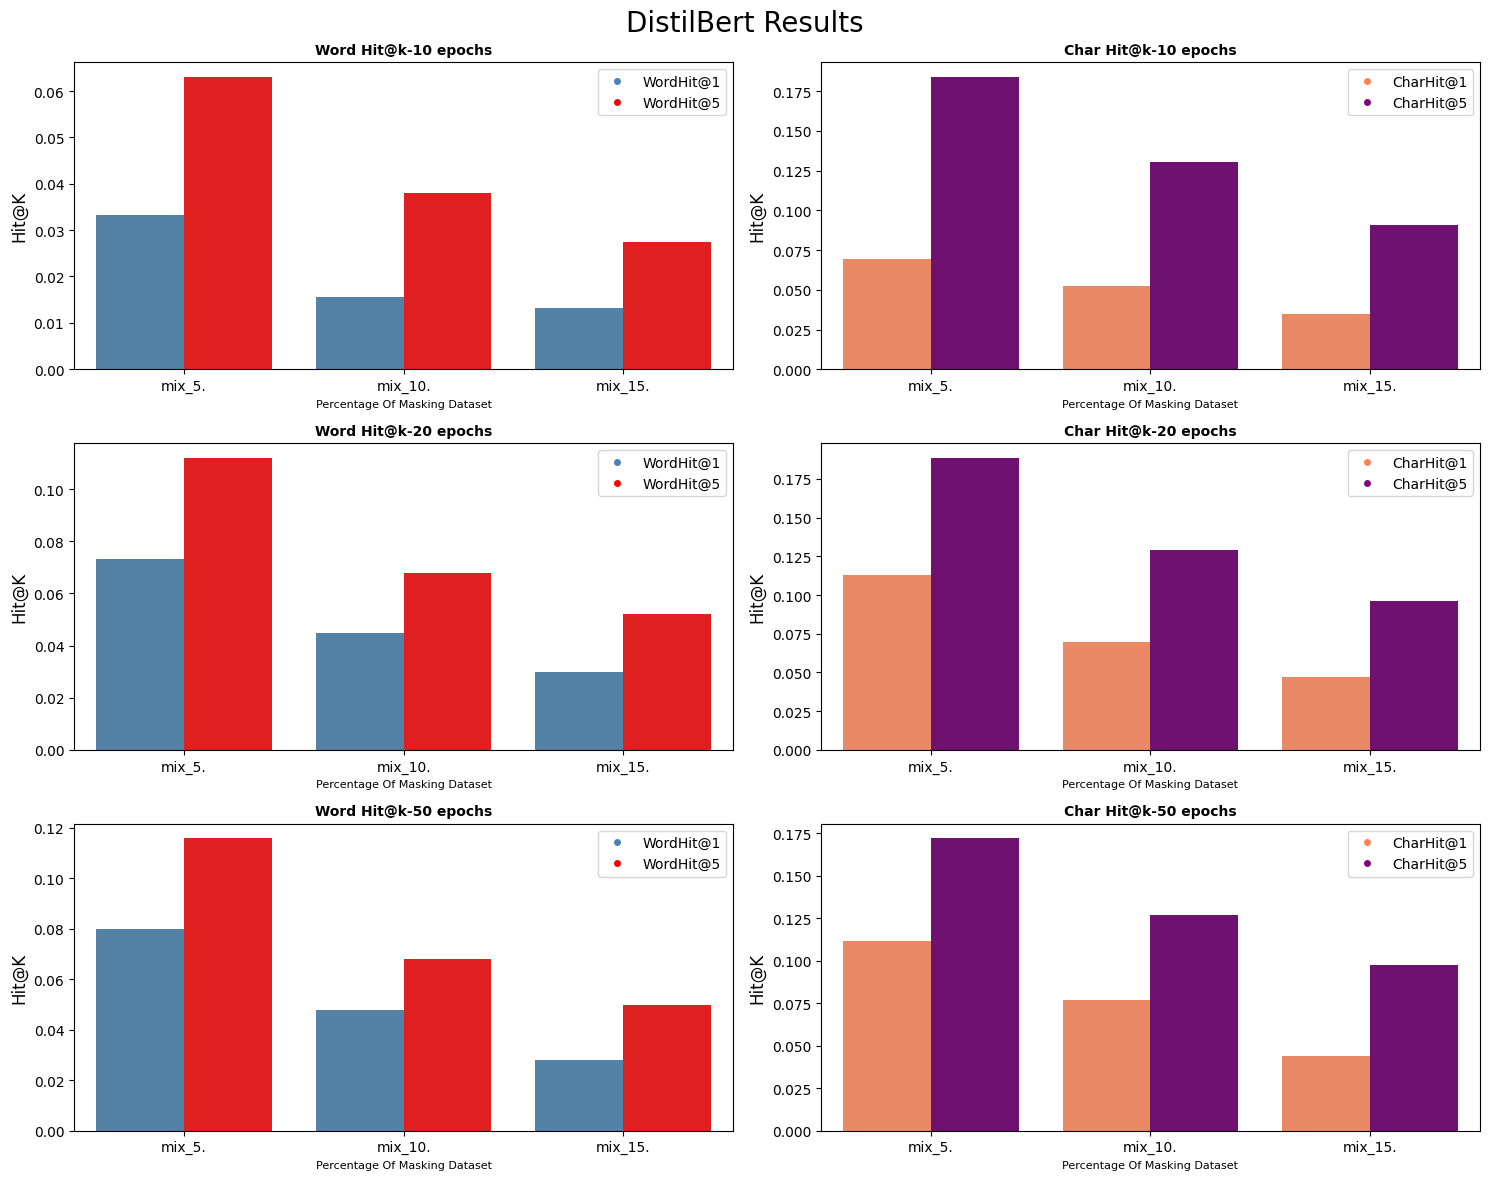

In [278]:
plot_results_finetuning(lst_word_chars_results_foreach_model,["steelblue", "red"],["coral", "purple"],"DistilBert",3)

### **Mbert Results:**

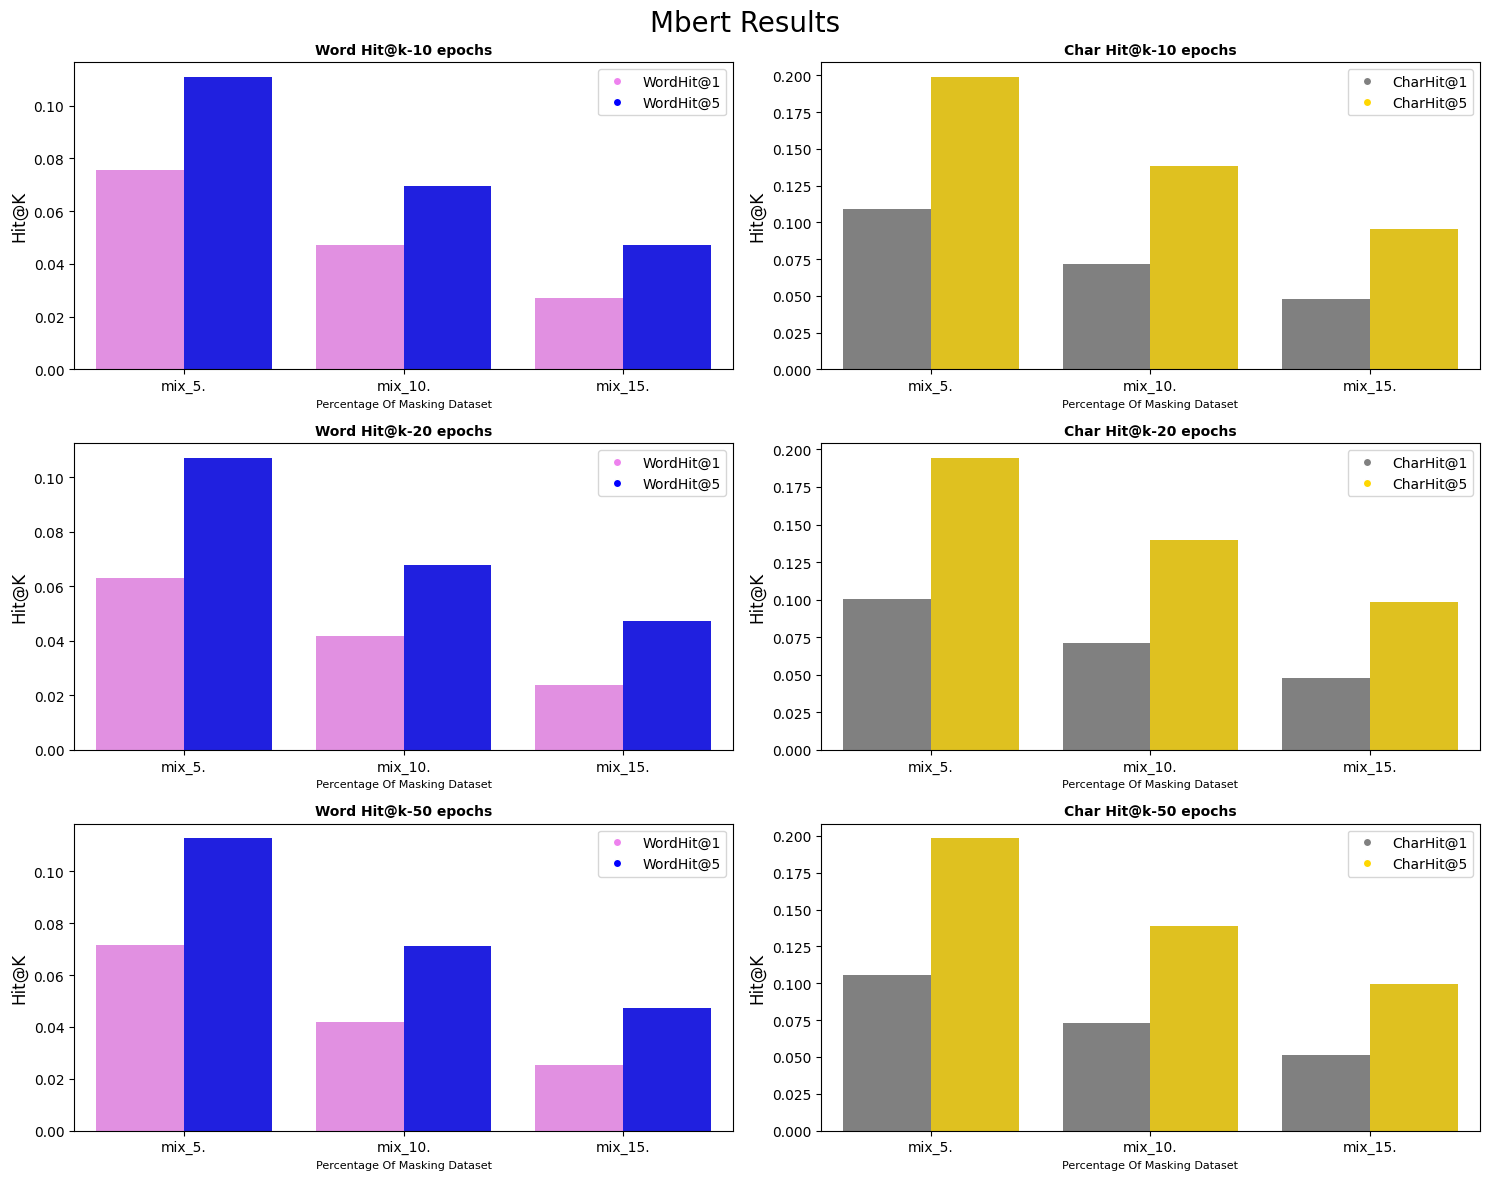

In [279]:
plot_results_finetuning(lst_word_chars_results_foreach_model,["violet", "blue"],["grey", "gold"],"Mbert",6)

## **Comparing The Ensemble Model To Fined Tuned Models**

In [280]:
lst_finetuning_chars_results=[]
lst_finetuning_words_results=[]
j=0
for i in range(3):
  chars_finetu = [lst_word_chars_results_foreach_model[0][0+j],lst_word_chars_results_foreach_model[0][1+j],lst_word_chars_results_foreach_model[0][2+j],merged_df_chars]
  chars_merge_finetun = pd.concat(chars_finetu, axis=0, ignore_index=True)
  words_finetu = [lst_word_chars_results_foreach_model[1][0+j],lst_word_chars_results_foreach_model[1][1+j],lst_word_chars_results_foreach_model[1][2+j],merged_df_words]
  words_merge_finetun = pd.concat(words_finetu, axis=0, ignore_index=True)
  j+=3
  lst_finetuning_chars_results.append(chars_merge_finetun)
  lst_finetuning_words_results.append(words_merge_finetun)



In [281]:
lst_hitk_each_model=[]
for i in [lst_finetuning_words_results,lst_finetuning_chars_results]:
  for df in i:
    groups = df.groupby('Char/Word')
    lst_finetuned_models=[]
    # Iterate over groups and create individual dataframes
    for name, group in groups:
        # Create new dataframe with only rows for current group
        new_df = group.copy()
        lst_finetuned_models.append(new_df)
  
    lst_hitk_each_model.append(lst_finetuned_models)

**We compare between fine tuning models to our ensemble model at each type of hit@k:**

- **charhit@1, charhit@5**
-**wordhit@1,wordhit@5**

In [282]:
def plot_Compare_result(lst_word_chars_results_foreach_model,colors1,color2,model_name,index):
  fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
  flag=False
  for i,eval in enumerate(['Word','Char']):
      for j,k in enumerate([1,5]):
        if i==1 and j==0:
          index+=3
        sns.barplot(x='file', y='hit@k',data=lst_word_chars_results_foreach_model[0+index][j],hue='model',palette=colors1+color2, ax=axs[i,j])
        axs[i,j].set_title(eval+ "Hit@"+str(k), fontsize=10, fontweight="bold")
        axs[i,j].set_xlabel("Percentage Of Masking Dataset", fontsize=8)
        axs[i,j].set_ylabel("Hit@"+str(k), fontsize=12)
        legend_elements2 = [plt.Line2D([0], [0],marker='o', color='w', label='10 epochs', markerfacecolor=colors1[0], markersize=6),
                      plt.Line2D([0], [0], marker='o', color='w', label='20 epochs', markerfacecolor=colors1[1], markersize=6),
                      plt.Line2D([0], [0],marker='o', color='w', label='50 epochs', markerfacecolor=color2[0], markersize=6),
                      plt.Line2D([0], [0], marker='o', color='w', label='Ensemble', markerfacecolor=color2[1], markersize=6)]
        axs[i,j].legend(handles=legend_elements2, loc='upper right')


  fig.suptitle(model_name+ ' Results', fontsize=20)


## **AlephBertGimel Vs Ensemble**

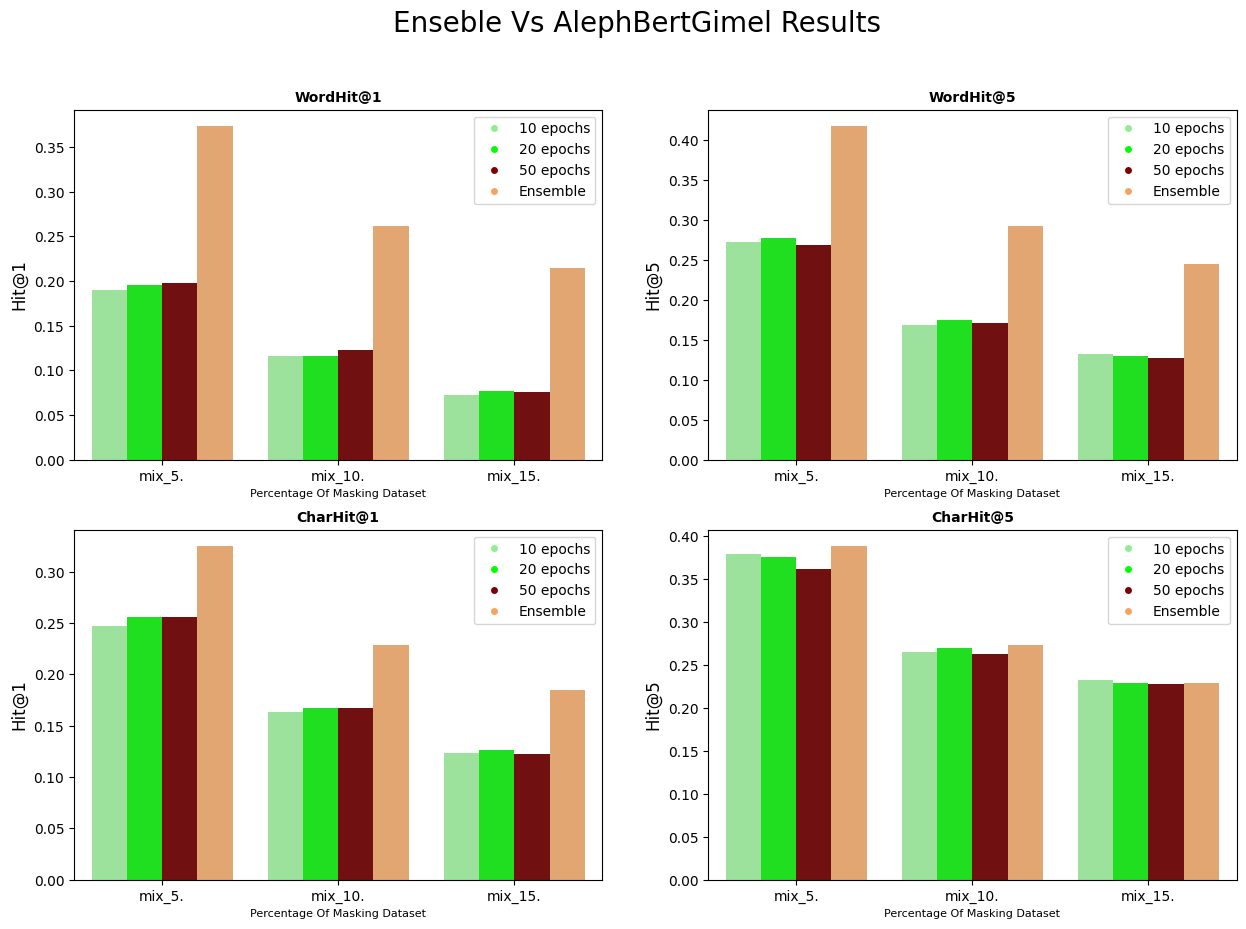

In [284]:
plot_Compare_result(lst_hitk_each_model,["lightgreen", "lime"],["maroon", "sandybrown"],'Enseble Vs AlephBertGimel',0)

## **DistilBert Vs Ensemble**

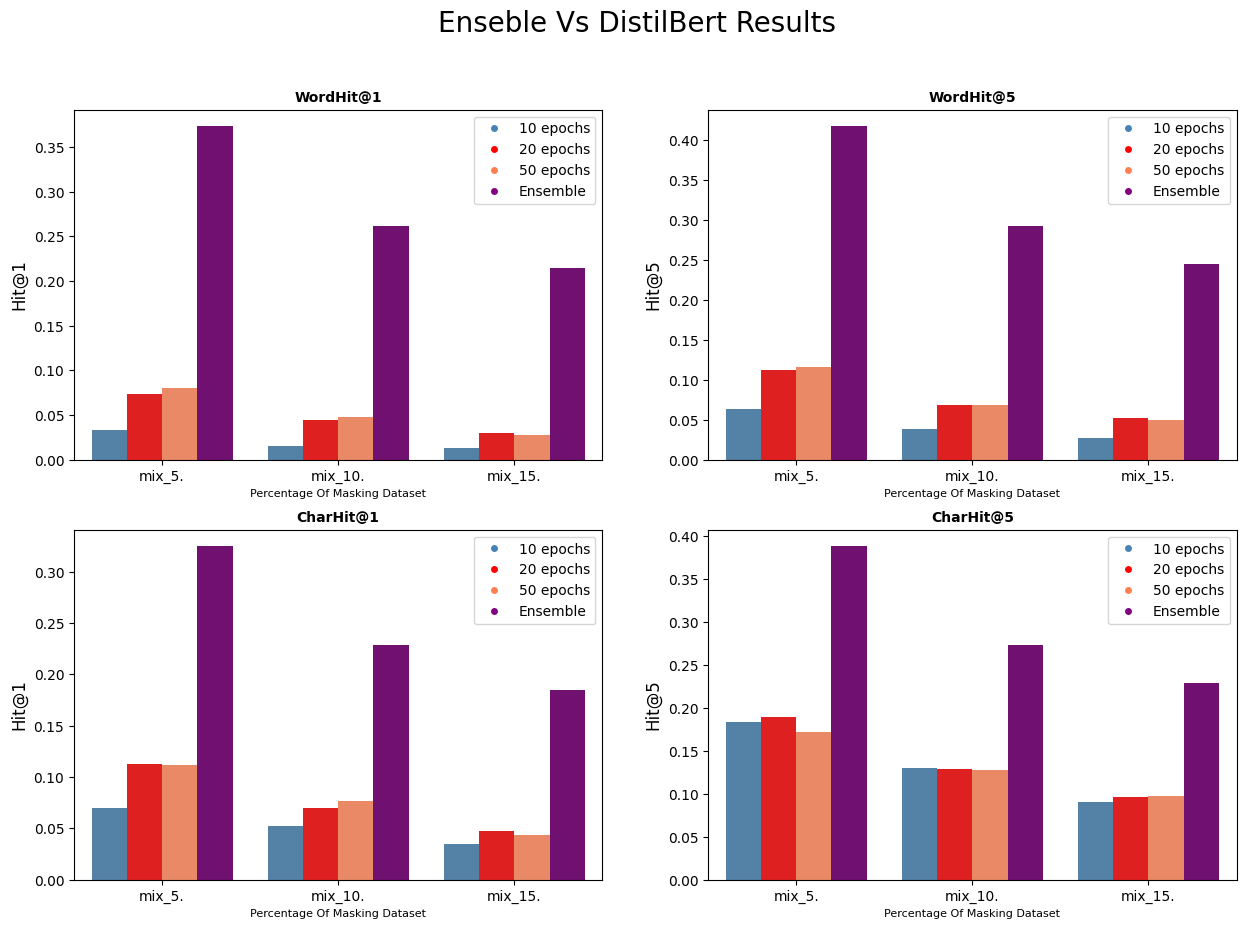

In [285]:
plot_Compare_result(lst_hitk_each_model,["steelblue", "red"],["coral", "purple"],'Enseble Vs DistilBert',1)

## **Mbert Vs Ensemble**

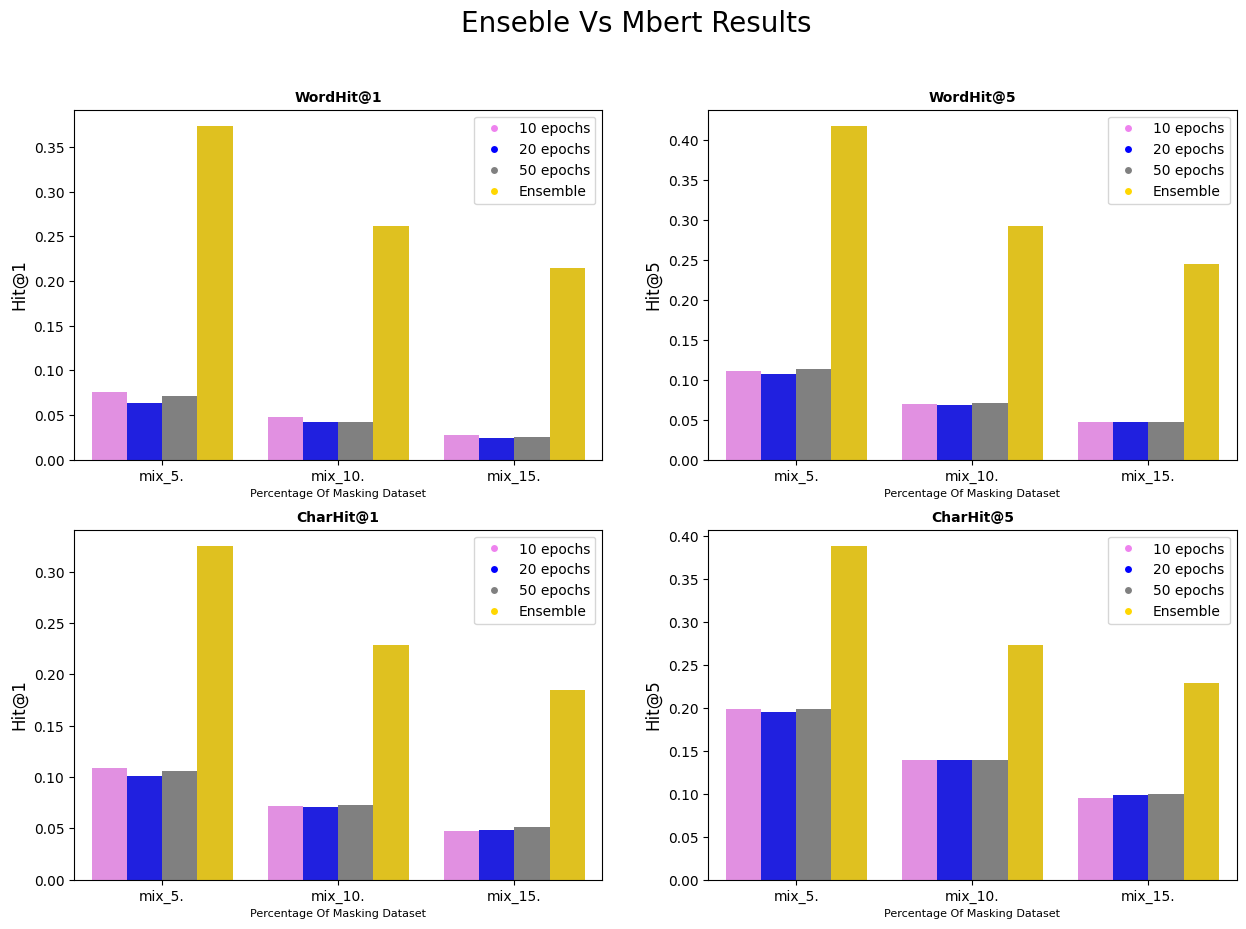

In [286]:
plot_Compare_result(lst_hitk_each_model,["violet", "blue"],["grey", "gold"],'Enseble Vs Mbert',2)